In [1]:
from scipy.stats import norm, gmean
import numpy as np
import math
from numba import jit, prange
import matplotlib.pyplot as plt

# Структурные продукты с полной защитой капитала

## СП с использованием азиатских опционов

Пример 1. Имеется 0,1 млн рублей, которые клиент готов инвестировать на 1 год. Текущая цена акции 100 руб., прогнозируется рост акции. Волатильность акции – 30%, депозитная процентная ставка и безрисковая процентная ставка – 7%. Периодичность наблюдения – 1 день. Постройте структурный продукт с полной гарантией возврата инвестированного капитала и азиатского опциона call.

In [2]:
def Geometric_Average_Rate_Call(S, K , T , r , b , sigma):
  sigmaA = sigma/np.sqrt(3)
  bA = (b - sigma**2/6)/2
  d1 = (np.log(S/K)+(bA + sigmaA**2/2)*T)/(sigmaA*np.sqrt(T))
  d2 = d1 - sigmaA * np.sqrt(T)
  return S * np.exp((bA - r)*T) * norm.cdf(d1) - K * np.exp(-r*T)*norm.cdf(d2)

S = 100
K = 100
T = 1
r = 0.07
q = 0.0
sigma = 0.3

print ('Геометрическая среднее. Стоимость азиатского опциона колл =', Geometric_Average_Rate_Call(S , K , T , r , r-q , sigma))
# 7.906075677449117

Геометрическая среднее. Стоимость азиатского опциона колл = 7.906075677449117


## Задача

Задача. В услових примера вычислите коэффициент участия.

Ответ: PR = 85.5%

In [3]:
N = 1

asian_c = Geometric_Average_Rate_Call(S , K , T , r , r-q , sigma)
DA = np.exp(-r * T) * N

Q = (N - DA) / asian_c

Q * 1000

np.float64(8.551167842585686)

## Задача

Задача. Имеется 0,1 млн рублей, которые клиент готов инвестировать на 1 год. Текущая цена акции 100 руб., прогнозируется падение акции. Волатильность акции – 30%, депозитная процентная ставка и безрисковая процентная ставка – 7%. Периодичность наблюдения – 1 день. Постройте структурный продукт с полной гарантией возврата инвестированного капитала и азиатского опциона put.

Постройте графики выплат для опциона колл и пут. Сделайте выводы.

In [4]:
def geometric_asian_price(S0, K, r, sigma, T, M, option_type="call"):
    """
    Calculate the price of a Geometric Asian option analytically.

    Parameters:
        S0 (float): Initial stock price.
        K (float): Strike price.
        r (float): Risk-free rate.
        sigma (float): Volatility.
        T (float): Time to maturity.
        M (int): Number of time steps.
        option_type (str): 'call' or 'put'.

    Returns:
        float: Geometric Asian option price.
    """
    sigsqT = ((sigma ** 2 * T * (M + 1) * (2 * M + 1)) / (6 * M ** 2))
    muT = 0.5 * sigsqT + (r - 0.5 * sigma ** 2) * T * (M + 1) / (2 * M)
    
    d1 = (np.log(S0 / K) + (muT + 0.5 * sigsqT)) / np.sqrt(sigsqT)
    d2 = d1 - np.sqrt(sigsqT)
    
    if option_type == "call":
        price = np.exp(-r * T) * (S0 * np.exp(muT) * norm.cdf(d1) - K * norm.cdf(d2))
    elif option_type == "put":
        price = np.exp(-r * T) * (K * norm.cdf(-d2) - S0 * np.exp(muT) * norm.cdf(-d1))
    else:
        raise ValueError("Invalid option type. Choose 'call' or 'put'.")
    
    return price

In [5]:
def Geometric_Average_Rate_Put(S, K , T , r , b , sigma):
  sigmaA = sigma/np.sqrt(3)
  bA = (b - sigma**2/6)/2
  d1 = (np.log(S/K)+(bA + sigmaA**2/2)*T)/(sigmaA*np.sqrt(T))
  d2 = d1 - sigmaA * np.sqrt(T)
  return K * np.exp(-r*T)*norm.cdf(-d2) - S * np.exp((bA - r)*T) * norm.cdf(-d1)

In [6]:
def calculate_deposit(N, r, T):
    """
    Calculate the amount to be deposited and the percentage of total funds.

    Parameters:
    - N: Total capital
    - r: Risk-free interest rate
    - T: Time to maturity

    Returns:
    - deposit_amount: Amount to be deposited
    - deposit_percentage: Percentage of total funds to be deposited
    """
    deposit_amount = N * np.exp(-r * T)
    deposit_percentage = np.exp(-r * T) * 100
    return deposit_amount, deposit_percentage

def calculate_risk_part(N, deposit_amount):
    """
    Calculate the amount to invest in options.

    Parameters:
    - N: Total capital
    - deposit_amount: Amount to be deposited

    Returns:
    - risk_part: Amount to invest in options
    """
    return N - deposit_amount

def calculate_participation_ratio(S, risk_part, option_price, N):
    """
    Calculate the participation ratio.

    Parameters:
    - S: Current stock price
    - risk_part: Amount invested in options
    - option_price: Price of the option
    - N: Total capital

    Returns:
    - PR: Participation ratio
    """
    return min(S * round(risk_part / option_price) / N, 1)

def plot_asian_option_payoffs(S_grid, K, T, r, q, sigma):
    """
    Plot the payoffs of Asian options.

    Parameters:
    - S_grid: Array of stock prices
    - K: Strike price
    - T: Time to maturity
    - r: Risk-free interest rate
    - q: Dividend yield
    - sigma: Volatility
    """
    asian_c = Geometric_Average_Rate_Call(S_grid, K, T, r, r - q, sigma)
    asian_p = Geometric_Average_Rate_Put(S_grid, K, T, r, r - q, sigma)

    plt.plot(S_grid, asian_c, label='Выплаты колл')
    plt.plot(S_grid, asian_p, label='Выплаты пут')
    plt.title('Выплаты азиатских опционов')
    plt.xlabel('Цена базового актива')
    plt.ylabel('Выплаты')
    plt.legend()
    plt.tight_layout()
    plt.show()

def main(N, T, S, r, q, sigma):
    """
    Main function to perform the analysis and plotting.

    Parameters:
    - N: Total capital
    - T: Time to maturity
    - S: Current stock price
    - r: Risk-free interest rate
    - q: Dividend yield
    - sigma: Volatility
    """
    deposit_amount, deposit_percentage = calculate_deposit(N, r, T)
    print(f'Убираем на депозит: {deposit_amount:.2f}, что является {deposit_percentage:.2f} % от всей суммы')

    risk_part = calculate_risk_part(N, deposit_amount)
    print(f'На сумму {risk_part:.2f} покупаем опцион')

    option_price = Geometric_Average_Rate_Put(S, K, T, r, r - q, sigma)
    PR = calculate_participation_ratio(S, risk_part, option_price, N)
    print(f'Коэффициент участия: {PR:.2f}')

    S_grid = np.linspace(S * 0.5, S * 2, 100)
    plot_asian_option_payoffs(S_grid, K, T, r, q, sigma)


Убираем на депозит: 93239.38, что является 93.24 % от всей суммы
На сумму 6760.62 покупаем опцион
Коэффициент участия: 1.00


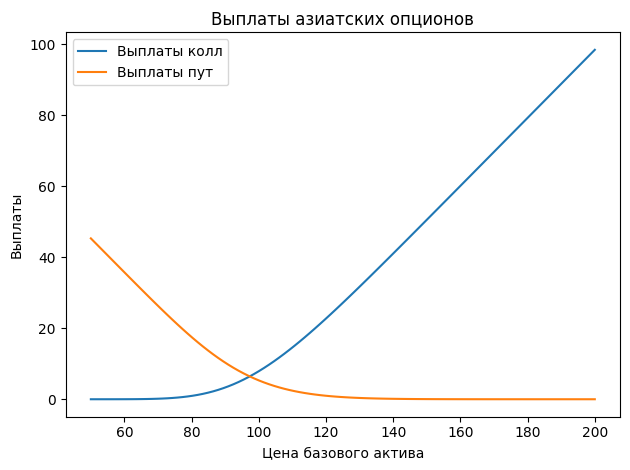

In [7]:
# Parameters
N = 10**5  # Total capital
T = 365  # Time to maturity in days
S = 100  # Current stock price
r = 0.07 / T  # Risk-free interest rate
q = 0  # Dividend yield
sigma = 0.3 / np.sqrt(T)  # Volatility
K = 100  # Strike price (assumed to be defined)
main(N, T, S, r, q, sigma)

## Задача

Задача. Проведите исследование и сравните влияние периодичности наблюдения (1 день, 1 неделя, 1 месяц) на
*   стоимость азиатского опциона,
*   волатильность.

Сделайте выводы, подкрепите выводы иллюстративными графиками.

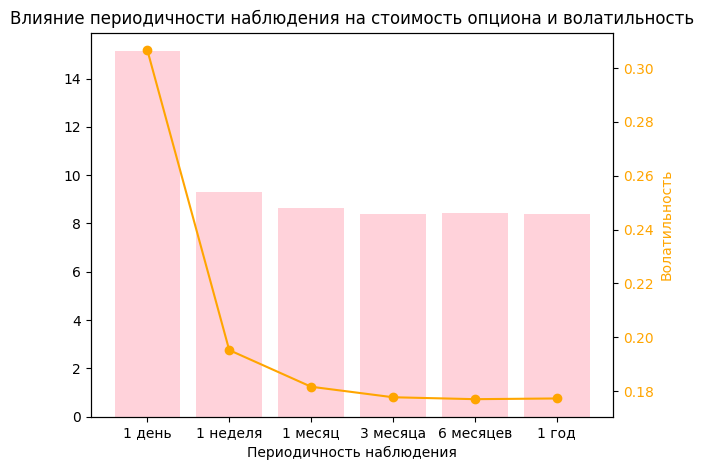

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Задаваемые параметры
S0 = 100        # Начальная цена акции
K = 100         # Страйк-цена
r = 0.07        # Безрисковая ставка
sigma = 0.30    # Волатильность
T = 1           # Время до экспирации (1 год)
investment = 0.1e6  # Сумма инвестиций

frequencies = [1, 7, 30, 90, 180, 365]  # 1 день, 1 неделя, 1 месяц и т.д.
labels = ['1 день', '1 неделя', '1 месяц', '3 месяца', '6 месяцев', '1 год']

num_simulations = 100000

option_prices = []
volatilities = []

def monte_carlo_asian_option(S0, K, r, sigma, T, M, num_simulations):
    dt = T / M
    S = np.zeros((num_simulations, M + 1))
    S[:, 0] = S0
    
    for t in range(1, M + 1):
        Z = np.random.standard_normal(num_simulations)
        S[:, t] = S[:, t - 1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z)
    
    S_avg = S[:, 1:].mean(axis=1)
    payoff = np.maximum(S_avg - K, 0)
    option_price = np.exp(-r * T) * payoff.mean()
    return option_price, S

for M in frequencies:
    option_price, simulated_paths = monte_carlo_asian_option(S0, K, r, sigma, T, M, num_simulations)
    option_prices.append(option_price)
 
    avg_prices = simulated_paths[:, 1:].mean(axis=1)
    volatility = np.std(avg_prices) / np.mean(avg_prices)
    volatilities.append(volatility)

# Построение графика
fig, ax1 = plt.subplots()

# Левый график (стоимость опциона)
ax1.bar(labels, option_prices, color='pink', alpha=0.7, label="Стоимость опциона")
ax1.set_xlabel("Периодичность наблюдения")
ax1.tick_params(axis='y', labelcolor='black')

# Правый график (волатильность)
ax2 = ax1.twinx()
ax2.plot(labels, volatilities, color='orange', marker='o', label="Волатильность")
ax2.set_ylabel("Волатильность", color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Заголовок и легенда
plt.title("Влияние периодичности наблюдения на стоимость опциона и волатильность")
fig.tight_layout()
plt.show()


Пример 2. Оцените стоимость азиатского опциона колл с использованием метода Монте-Карло. При условиях цена базового актива и страйк 100, дата экспирации через 1 год, безрисковая ставка 7%, волатильность 30%. Переодичность наблюдений - 1 день, количество траекторий 1000.

In [9]:
# Box-Muller transform to generate normal deviates
def getGaussian(mu, sigma, n):

	# Generate a pair of uniform random variables U,V
  U = np.random.uniform(0, 1, n)
  V = np.random.uniform(0, 1, n)

  # Get R~Exponential(1) and Theta~Uniform(0, 2pi) random variables
  R     = -np.log(U)
  Theta = 2*np.pi*V

	# Transform to X and Y
  X = np.multiply(np.sqrt(2*R), np.cos(Theta))
  Y = np.multiply(np.sqrt(2*R), np.sin(Theta))

  # Perform location-scale transform
  X = mu + sigma*X
  Y = mu + sigma*Y
  return X, Y

In [10]:
def gbm_mcs(mu, sigma, S0, T, n, noOfPaths):
  S = []
  delta_t = T/n
  # Mean and variance of a lognormal random walk
  mean = S0 * np.exp((mu+(0.5*sigma**2))*T)
  variance = (S0 ** 2)*np.exp(2*mu*T + 2*(sigma ** 2)*T)*(np.exp(sigma**2)*T-1)
  for i in range(noOfPaths):
    X, Y = getGaussian(0, 1, n)
    dz_t = X
    dW_t = np.sqrt(delta_t) * dz_t
    dX_t = mu * delta_t + sigma * dW_t
    X_t = np.cumsum(dX_t)
    S_t = S0 * np.exp(X_t)
    S.append(S_t)
  S = np.array(S)
  return S, mean, variance

In [11]:
S0 = 100

noOfPaths = 1000
T = 1
n = 250

K = 100
r = 0.07

sigma = 0.3
mu = r - (0.5*sigma**2)

In [12]:
# Simulate a lognormal random walk
S, mean, variance = gbm_mcs(mu, sigma, S0, T, n, noOfPaths)
c = 0.0
for i in range(noOfPaths):
  c = c + max(np.mean(S[i]) - K, 0)
disc = np.exp(-r*T)
#c = disc * (c/noOfPaths)
print ('Монте-Карло моделирование. Стоимость азиатского опциона колл =', disc * (c/noOfPaths))
#print(c)

Монте-Карло моделирование. Стоимость азиатского опциона колл = 8.176352764398553


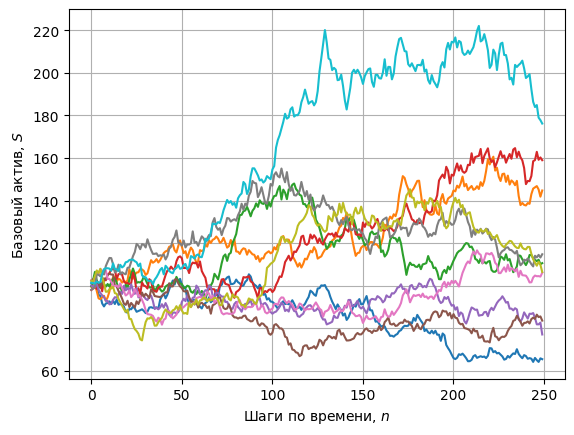

In [13]:
import matplotlib.pyplot as plt

time = list(range(n))
for i in range(10):
  plt.plot(time, S[i])

plt.xlabel('Шаги по времени, $n$')
plt.ylabel('Базовый актив, $S$')
plt.grid(True)
plt.show()

## Задача

Задача. Переписать цикл for и избавиться от использования констант (использовать переменную step).

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [15]:
def plot_density(S, mean, variance, noOfPaths, n, step=50):
    """
    Plots a 3D density plot of the underlying price.

    Parameters:
    - S: 2D array of simulated paths
    - mean: Mean of the underlying asset
    - variance: Variance of the underlying asset
    - noOfPaths: Number of simulated paths
    - n: Total number of steps
    - step: Number of steps for the histogram (default is 50)
    """
    # Calculate standard deviation
    sd = np.sqrt(variance)
    
    # Create figure and 3D axis
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # Define the range for the x-axis
    x = np.linspace(mean - 3 * sd, mean + 3 * sd, step + 1)
    
    # Get the colormap
    cmap = plt.colormaps['viridis']
    
    # Define steps and corresponding colors
    steps = np.arange(0, n, step) + step
    colors = [cmap(i / n) for i in steps]

    for i, color in zip(steps, colors):
        hist, _ = np.histogram(S[:, i - 1], bins=x)
        hist_normalized = hist / noOfPaths
        ax.bar(x[:-1], hist_normalized, i, zdir='y', color=color, alpha=0.8)

    ax.set_xlabel('Базовый актив, $S$')
    ax.set_ylabel('Время, $t$')
    ax.set_zlabel('Частота, $z$')

    plt.show()


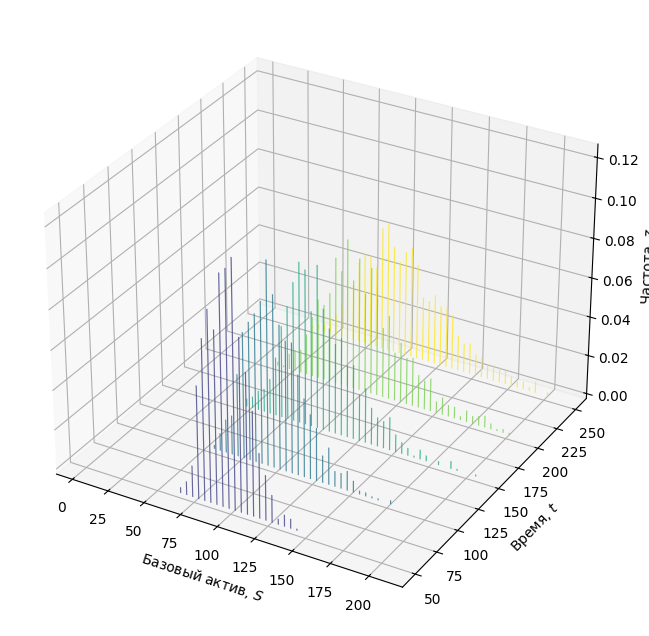

In [16]:
plot_density(S, mean, variance, noOfPaths, n)

## Задача

Задача. Проверить гипотезу о том, что на разных временных шагах гистограммы принадлежат одному распределению.

In [17]:
from scipy.stats import ks_2samp
step = 50
steps = np.arange(0, n, step) + step
results_ks = []

for i in range(len(steps)):
    for j in range(i+1, len(steps)):
        t1, t2 = steps[i], steps[j]
        statistic, pvalue = ks_2samp(S[:,t1-1], S[:,t2-1])
        results_ks.append((t1, t2, statistic, pvalue))

print("Результаты теста Колмогорова-Смирнова:")
for res in results_ks:
    t1, t2, ks_stat, ks_pvalue = res
    print(f"Временные шаги {t1} и {t2}: KS-stat = {ks_stat:.4f}, p-value = {ks_pvalue:.4f}")

Результаты теста Колмогорова-Смирнова:
Временные шаги 50 и 100: KS-stat = 0.0980, p-value = 0.0001
Временные шаги 50 и 150: KS-stat = 0.1540, p-value = 0.0000
Временные шаги 50 и 200: KS-stat = 0.1830, p-value = 0.0000
Временные шаги 50 и 250: KS-stat = 0.2150, p-value = 0.0000
Временные шаги 100 и 150: KS-stat = 0.0700, p-value = 0.0149
Временные шаги 100 и 200: KS-stat = 0.1010, p-value = 0.0001
Временные шаги 100 и 250: KS-stat = 0.1330, p-value = 0.0000
Временные шаги 150 и 200: KS-stat = 0.0490, p-value = 0.1812
Временные шаги 150 и 250: KS-stat = 0.0740, p-value = 0.0084
Временные шаги 200 и 250: KS-stat = 0.0430, p-value = 0.3137


Пример.
В условиях примера 1

1. Вычислите  результаты от инвестирования используя
формулу выплаты:
$$
r_{SP} =
\max\left( r_{SP \min}, r_{SP \min} + PR \times \frac{P_{avg} - S}{S}\right),
$$
здесь $\frac{P_{avg} - S}{S}$ -- доходность базового актива относительно среднего значения $P_{avg}$, $S$ -- цена начала участия, или страйк встроенных опционов (в
простейшем случае он равен цене спот базового актива на момент выпуска продукта, т.е. $P_0$).

2. Постройте продукт со встроенным азиатским опционом, оцененным методом Монте-Карло. Для уменьшения разброса в качестве control variate использовать геометрическое усреднение. Вычислите доверительный интервал.

3. Сравните полученные результаты с результатами предыдущих задач и подкрепите выводы иллюстративными графиками.

In [18]:
def bs_call_exact(t, s0, k, r, sigma):
    dp = 1 / ( sigma * math.sqrt( t ) ) * ( math.log( s0 / k ) + ( r + sigma**2 / 2) * ( t ) )
    dm = dp - sigma * math.sqrt( t )
    return s0 * norm.cdf(dp) - k * math.exp( - r * t ) * norm.cdf(dm)

# profit compare with vanilla call
def call(S, K, tau, vol, r, q):
    d1 = (np.log (S / K) + (r + vol**2 / 2) * tau) / (vol * np.sqrt(tau))
    d2 = d1 - vol * np.sqrt(tau)
    return S * np.exp(-q * tau) * norm.cdf(d1) - K * np.exp (-r * tau) * norm.cdf(d2)

@jit(nopython=True, inline = 'always')
def wiener(t):
    return math.sqrt( t ) * np.random.normal(0, 1)

@jit(nopython=True, inline = 'always')
def st(t, s0, r, sigma):
    return s0 * math.exp( ( r - sigma**2 / 2) * t + sigma * wiener( t ) )

@jit(parallel=True, nopython=False)
def asian_bs_call_mc_geom(n_iters, T, t_steps, S0, K, r, sigma):
    payoff = np.zeros(n_iters)
    avg_S = np.zeros(n_iters)
    m = len(t_steps)
    for i in prange(0, n_iters):
        geom_avg_s = 0
        S0_j = S0
        for j in range(1, m):
            S_j = st( (t_steps[j] - t_steps[j-1] ) * T, S0_j, r, sigma)
            S0_j = S_j
            geom_avg_s += math.log(S_j)
        geom_avg_s = math.exp(geom_avg_s / ( m - 1))
        avg_S[i] = geom_avg_s
        payoff[i] = math.exp(-r * T) * max(geom_avg_s - K , 0)
    return payoff, avg_S

In [19]:
N_MC = int(10**5)
T, S0, K, r, sigma = 1, 100, 100, 0.07, 0.3
m = 1000
t_steps = np.array([i/m for i in range(0, m + 1)])
payoff_data, S_data = asian_bs_call_mc_geom(N_MC, T, t_steps, S0, K, r, sigma)
asian_call = np.mean(payoff_data)
print(f"asian call = {asian_call:.4f} +- {1.96 / math.sqrt(n) * np.std(payoff_data):.4f} with 95% prob")

asian call = 7.9137 +- 1.4414 with 95% prob


In [20]:
N = 100000

capital_guarantee = 1
r_sp_min = capital_guarantee - 1
da = N * np.exp(-r * T) * capital_guarantee

Q_1 = (N - da) / asian_call
PR_1 = K * Q_1/ N
S_1 = np.sort(S_data)
r_sp_1 = np.maximum(r_sp_min, r_sp_min + PR_1 *(S_1 - S0) / S0 )

print(f"asian call r_sp_mean = {np.mean(r_sp_1)}, PR = {PR_1}")

asian call r_sp_mean = 0.07250818125421636, PR = 0.8542904213696606


In [21]:
european_call = bs_call_exact(T, S0, K, r, sigma)
Q_2 = (N - da) / european_call
PR_2 = K * Q_2/ N
S_2 = np.sort(np.array([st(T, S0, r, sigma) for i in range(0, N_MC)]))
r_sp_2 = np.maximum(r_sp_min, r_sp_min + PR_2 *(S_2 - S0) / S0 )

print(f"european call r_sp_mean = {np.mean(r_sp_2)}, PR = {PR_2}")

european call r_sp_mean = 0.07184460492620764, PR = 0.44447044652333806


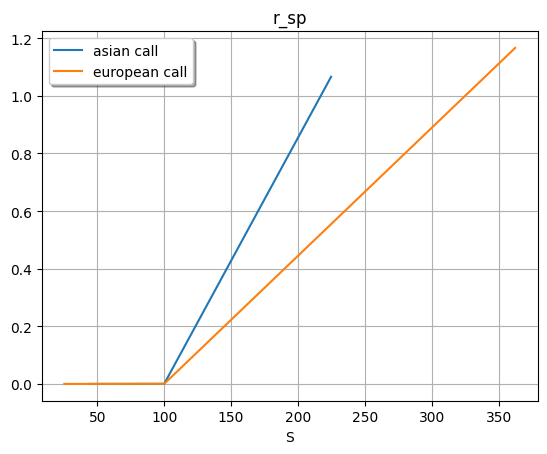

In [22]:
plt.plot(S_1, r_sp_1, label = 'asian call')
plt.plot(S_2, r_sp_2, label = 'european call')

plt.title('r_sp')
plt.xlabel('S')
plt.legend(loc = 'best', fancybox = True, shadow = True)
plt.grid(True)

In [23]:
S0 = 100
K = 100
T = 1
r = 0.07
q = 0.0
sigma = 0.3
call_price = Geometric_Average_Rate_Call(S0, K , T , r , r-q , sigma)
print ('Geometric average rate call =', call_price)

cash =100_000
risk_part = cash - cash * np.exp(-r * T)
PR = S0 * round(risk_part / call_price) / cash
print('Participation rate = ', PR)

# task calc Rsp
rsp_min = 1 - 1 # full return guarantee (100%) minus 100%
rsp = np.maximum(rsp_min, rsp_min + PR * (S.mean(axis=1).mean() - S0)/S0)
print('Rsp averaged over 1000 samples = {}%'.format(round(rsp*100,2)))

Geometric average rate call = 7.906075677449117
Participation rate =  0.855
Rsp averaged over 1000 samples = 2.68%


In [24]:
# task 2 evaluate asian option price using MC method
import scipy.stats

print('Наблючений:', S.shape)
# geometric averaging
S_means = np.prod(S**(1/S.shape[1]), axis=1)
payoffs = np.exp(-r * T) * np.maximum(S_means - K, 0)
avg_payoff = np.mean(payoffs)
std_error = np.sqrt(np.sum((payoffs - avg_payoff)**2) / (payoffs.shape[0] - 1))
print('Среднее значание функции выплат = ', round(avg_payoff,3))
print('Стандартная ошибка = ', round(std_error, 3))
scaler = scipy.stats.t.ppf((1 + 0.95) / 2., payoffs.shape[0] - 1)
print(f'Доверительный интервал : [{avg_payoff - std_error * scaler:.3f}(0):{avg_payoff + std_error * scaler:.3f}]')

Наблючений: (1000, 250)
Среднее значание функции выплат =  7.677
Стандартная ошибка =  11.943
Доверительный интервал : [-15.758(0):31.113]


In [25]:
# task 3 compare results

print('Analytical Geometric average rate call =', round(call_price, 3))
print('Relative error for MC method = ', round(abs(call_price - avg_payoff) / call_price * 100, 3), '%\n')

# profit compare with vanilla call
def call(S, K, tau, vol, r, q):
    d1 = (np.log (S / K) + (r + vol**2 / 2) * tau) / (vol * np.sqrt(tau))
    d2 = d1 - vol * np.sqrt(tau)
    return S * np.exp(-q * tau) * norm.cdf(d1) - K * np.exp (-r * tau) * norm.cdf(d2)

call_price = call(S0, K , T , sigma , r, q)
print ('Стоимость опциона колл =', round(call_price, 3))

cash =100_000
risk_part = cash - cash * np.exp(-r * T)
PR = S0 * round(risk_part / call_price) / cash
print('Коэффициент участия = ', PR * 100, '%')

# task calc Rsp
rsp_min = 1 - 1 # full return guarantee (100%) minus 100%
rsp = np.maximum(rsp_min, rsp_min + PR * (S[:, -1].mean() - S0)/S0)
print('Rsp averaged over 1000 samples = {}%'.format(round(rsp*100,2)))

Analytical Geometric average rate call = 7.906
Relative error for MC method =  2.892 %

Стоимость опциона колл = 15.211
Коэффициент участия =  44.4 %
Rsp averaged over 1000 samples = 3.06%


Text(0.5, 0, 'Price S_T')

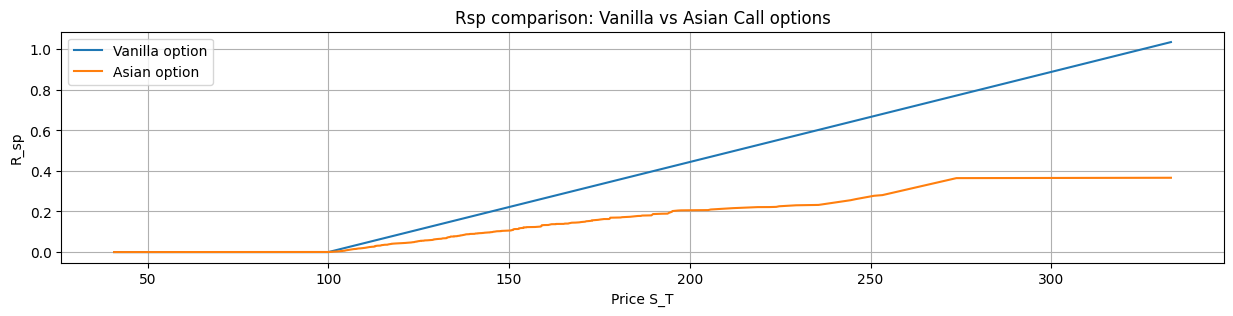

In [26]:
# profit plots
plt.figure(figsize=(15,3))
plt.title('Rsp comparison: Vanilla vs Asian Call options')
rsps = np.maximum(rsp_min, rsp_min + PR * (S[:, -1] - S0)/S0)
plt.plot(sorted(S[:, -1]), sorted(rsps), label='Vanilla option')
rsps2 = np.maximum(rsp_min, rsp_min + PR * payoffs/S0)
plt.plot(sorted(S[:, -1]), sorted(rsps2), label='Asian option')
plt.legend();plt.grid()
plt.ylabel('R_sp')
plt.xlabel('Price S_T')
# according to that payoff for an asian option is dependent on average asset price during the history
# the profit for this product is growth much slower than the one for vanilla option
# but
# it's not necessary has profit starting from price = S0 as below since we plotted only last price
# not average one, so actually it's possible to have positive pnl starting from price much lower

# Задача

Сравните различные методы оценивания (арифметический и Монте-Карло) азиатского опциона для бездивидентных акций:
$S_0= 116,79$, $К= 117$, срок погашения составляет 3 месяца. Волатильность акций составляет 0,02803, а безрисковый процент составляет 0,624% с непрерывным начислением процентов.


https://github.com/olof98johansson/FinancialOptionsModelling

https://webthesis.biblio.polito.it/20278/1/tesi.pdf

In [27]:
import numpy as np
from scipy.stats import norm

def geometric_asian_price(S0, K, r, sigma, T, M, option_type="call"):
    """
    Calculate the price of a Geometric Asian option analytically.

    Parameters:
        S0 (float): Initial stock price.
        K (float): Strike price.
        r (float): Risk-free rate.
        sigma (float): Volatility.
        T (float): Time to maturity.
        M (int): Number of time steps.
        option_type (str): 'call' or 'put'.

    Returns:
        float: Geometric Asian option price.
    """
    sigsqT = ((sigma ** 2 * T * (M + 1) * (2 * M + 1)) / (6 * M ** 2))
    muT = 0.5 * sigsqT + (r - 0.5 * sigma ** 2) * T * (M + 1) / (2 * M)
    
    d1 = (np.log(S0 / K) + (muT + 0.5 * sigsqT)) / np.sqrt(sigsqT)
    d2 = d1 - np.sqrt(sigsqT)
    
    if option_type == "call":
        price = np.exp(-r * T) * (S0 * np.exp(muT) * norm.cdf(d1) - K * norm.cdf(d2))
    elif option_type == "put":
        price = np.exp(-r * T) * (K * norm.cdf(-d2) - S0 * np.exp(muT) * norm.cdf(-d1))
    else:
        raise ValueError("Invalid option type. Choose 'call' or 'put'.")
    
    return price


def monte_carlo_asian_with_control_variate(S0, K, r, sigma, T, M, N, option_type="call"):
    """
    Price an Asian option using Monte Carlo simulation with control variate technique.

    Parameters:
        S0 (float): Initial stock price.
        K (float): Strike price.
        r (float): Risk-free rate.
        sigma (float): Volatility.
        T (float): Time to maturity.
        M (int): Number of time steps.
        N (int): Number of Monte Carlo simulations.
        option_type (str): 'call' or 'put'.

    Returns:
        float: Monte Carlo price with control variate.
    """
    dt = T / M
    discount = np.exp(-r * T)
    
    # Simulate price paths
    S = np.zeros((N, M + 1))
    S[:, 0] = S0
    for t in range(1, M + 1):
        Z = np.random.standard_normal(N)
        S[:, t] = S[:, t - 1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z)
    
    # Arithmetic mean
    S_mean_arith = np.mean(S[:, 1:], axis=1)
    
    # Payoff for arithmetic Asian option
    if option_type == "call":
        payoff_arith = np.maximum(S_mean_arith - K, 0)
    elif option_type == "put":
        payoff_arith = np.maximum(K - S_mean_arith, 0)
    else:
        raise ValueError("Invalid option type. Choose 'call' or 'put'.")
    
    # Geometric mean
    S_mean_geom = np.exp(np.mean(np.log(S[:, 1:]), axis=1))
    
    # Payoff for geometric Asian option
    if option_type == "call":
        payoff_geom = np.maximum(S_mean_geom - K, 0)
    elif option_type == "put":
        payoff_geom = np.maximum(K - S_mean_geom, 0)
    else:
        raise ValueError("Invalid option type. Choose 'call' or 'put'.")
    
    # Analytical price for geometric Asian option
    geom_price = geometric_asian_price(S0, K, r, sigma, T, M, option_type)
    
    # Control variate adjustment
    adjusted_payoff = payoff_arith + geom_price - payoff_geom
    mc_price = discount * np.mean(adjusted_payoff)
    
    return mc_price

In [28]:
# Parameters
S0 = 116.79        # Initial stock price
K = 117         # Strike price
r = 0.00624        # Risk-free rate
sigma = 0.02803     # Volatility
T = 0.25           # Time to maturity (1 year)
M = 50          # Number of time steps
N = 10000       # Number of Monte Carlo simulations

# Geometric Asian Option Prices
geom_call_price = geometric_asian_price(S0, K, r, sigma, T, M, option_type="call")
geom_put_price = geometric_asian_price(S0, K, r, sigma, T, M, option_type="put")
print(f"Geometric Asian Call Price (Analytic): {geom_call_price:.4f}")
print(f"Geometric Asian Put Price (Analytic): {geom_put_price:.4f}")

# Monte Carlo Asian Option Prices with Control Variate
mc_call_price = monte_carlo_asian_with_control_variate(S0, K, r, sigma, T, M, N, option_type="call")
mc_put_price = monte_carlo_asian_with_control_variate(S0, K, r, sigma, T, M, N, option_type="put")
print(f"Arithmetic Asian Call Price (MC with Control Variate): {mc_call_price:.4f}")
print(f"Arithmetic Asian Put Price (MC with Control Variate): {mc_put_price:.4f}")

Geometric Asian Call Price (Analytic): 0.3261
Geometric Asian Put Price (Analytic): 0.4449
Arithmetic Asian Call Price (MC with Control Variate): 0.3266
Arithmetic Asian Put Price (MC with Control Variate): 0.4432


# Структурные продукты без гарантии возврата капитала

## Задача.

Имеется 0,1 млн рублей, которые клиент готов инвестировать на 1 год. Ожидается рост цен на акции «A».  Клиент готов нести 30\% потери в случае падении цены акции <<А>> (меньше чем при прямой покупке акции) в обмен на увеличение коэффициента участия. Текущая цена акции 100 руб.

Входные параметры продукта:
*   базовый актив -- акции,
*   срок -- $T = 1$ год,
*   цена начала участия -- $P_0 = 100$рублей,
*   барьерная цена (тип барьера) -- «включаемый» (knock-in) и «выключаемый» (knock-out),
*   условия наблюдения с целью определения пробития барьера -- частота
наблюдений, длина периода наблюдений, расположение периода наблюдений
в случае, если оно частичное – в начале, середине, конце срока продукта;
*   сценарий поведения базового актива -- рост.

Выходной параметр продукта:
*   коэффициент участия.


Проведите расчеты и вычислите коэффициент участия.

In [29]:
def barrier_option_price(S, K, T, sigma, r, H, is_knock_in=True):
    barrier_hit = S < H
    if (is_knock_in and not barrier_hit) or (not is_knock_in and barrier_hit):
        return call(S, K, T, sigma, r, 0.0)
    return 0

def calculate_discounted_capital(N, risk_limit, r, T):
    guaranteed_capital = (1 - risk_limit) * N
    discounted_capital = guaranteed_capital * np.exp(-r * T)
    available_capital = N - discounted_capital
    return discounted_capital, available_capital

def calculate_option_prices(S0, K, T, sigma, r):
    H_knock_in = S0 * 0.9
    H_knock_out = S0 * 1.2

    knock_in_price = barrier_option_price(S0, K, T, sigma, r, H_knock_in, is_knock_in=True)
    knock_out_price = barrier_option_price(S0, K, T, sigma, r, H_knock_out, is_knock_in=False)

    return knock_in_price, knock_out_price

def calculate_payoff(S_T, alpha, risk_limit, N, S0):
    return np.maximum(alpha * (S_T - S0), -risk_limit * N)

def plot_payoff(S_T, payoff):
    plt.plot(S_T, payoff, label='Доходность клиента')
    plt.axhline(y=0, color='k', linestyle='--', linewidth=0.8)
    plt.xlabel('Цена базового актива $S_T$')
    plt.ylabel('Доходность')
    plt.title('Доходность продукта')
    plt.legend()
    plt.grid(True)
    plt.show()

def barrier_option_analysis(N, risk_limit, r, T, S0, K, sigma):
    """
    Perform barrier option analysis and plot the payoff.

    Parameters:
    - N: Total capital
    - risk_limit: Risk limit percentage
    - r: Risk-free interest rate
    - T: Time to maturity
    - S0: Initial stock price
    - K: Strike price
    - sigma: Volatility
    """

    # Calculate discounted capital and available capital
    discounted_capital, available_capital = calculate_discounted_capital(N, risk_limit, r, T)

    # Calculate option prices
    knock_in_price, knock_out_price = calculate_option_prices(S0, K, T, sigma, r)

    # Total option price
    total_option_price = knock_in_price + knock_out_price

    # Ensure the participation coefficient is in [0, 1]
    if total_option_price > 0:
        alpha = min(available_capital / total_option_price, 1)
    else:
        alpha = 0

    print(f"Коэффициент участия: {alpha:.2f}")

    # Define future stock prices
    S_T = np.linspace(50, 150, 100)

    # Calculate payoff
    payoff = calculate_payoff(S_T, alpha, risk_limit, N, S0)

    # Plot the payoff
    plot_payoff(S_T, payoff)

Коэффициент участия: 1.00


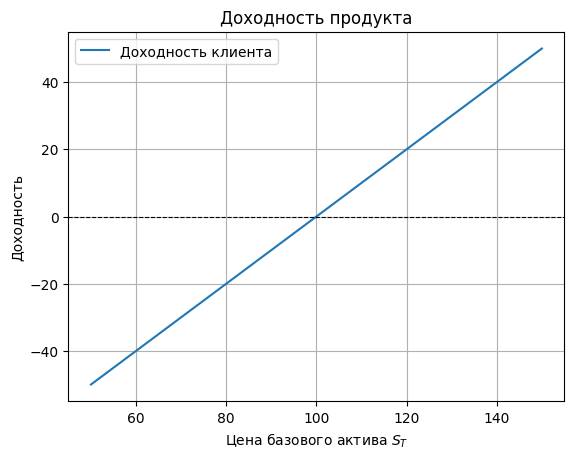

In [30]:
N = 10**5
S0 = 100
K = 100 
T = 1
sigma = 0.3
r = 0.07
risk_limit = 0.3

# Вызов функции анализа барьерного опциона
barrier_option_analysis(N, risk_limit, r, T, S0, K, sigma)